# Capstone Webscrapping using BeautifulSoup



![alt text](https://github.com/sabrinapribadi/BeautifulSoup-Capstone/blob/master/picts.png?raw=true)

In [1]:
import requests

url_get = requests.get('http://imdb.com/search/title/?release_date=2019-01-01,2019-12-31')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [ ]:
url_get.content[1:777]

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. But you’ll only ever have to deal with about four kinds of objects: `Tag`, `NavigableString`, `BeautifulSoup`, and `Comment`. But at this module we will only use `BeautifulSoup`.

In [ ]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

Let's see how our beautifulsoup looks like. As you can see, the content is the same with our `get_url` object but it's tidier. Also beautifulsoup give us method to make it even more prettier, for tidyness purpouse we slice to only see first 1045 character. 

In [ ]:
print(soup.prettify()[:1045])

We need to find the first table which contains all the informations or keys we needed about *Movies that released between 2019-01-01 and 2019-12-31*. `.find()` method is used to find the right keys and it will only return the result of the first inspection.

- Use `.find()` method to find the key and put it on `table` 
- `table` consists of all of the information needed from the first inspection.
- the values `lister-list`assigned to the `class` attribute within the the `<div>` tag

In [ ]:
table = soup.find('div', attrs={'class':'lister-list'})
print(table.prettify()[1:500])

`.find_all()` method will return the result from all inspection within `table` and put the result into `tr`.

In [6]:
tr = table.find_all('div', attrs={'class':'lister-item mode-advanced'})
tr_len = len(tr)
tr_len

50

We're going to do scrapping process by extracting informations about `title`, `imdb_ratings`, `metascores`, and `votes`. We need to locate all the informations we need on its correspondent HTML line by using DevTools (or inspect mode).


---


All the informations is contained within an anchor tag (`<a>`). This tag is nested within a header tag (`<h3>`). The `<h3>` tag is nested within a `<div>`tag. 


---

Unfortunately, there are movies that don't have any `metascores`. So, we need to add conditions to skip movies without a `metascore` and give them a `metascores` = 0


---

We need to obtain all the informations from all 50 movies


In [7]:
title = [] #initiating a tuple
imdb_ratings = [] #initiating a tuple
metascores = [] #initiating a tuple
votes = [] #initiating a tuple

for i in tr:
  # The name
    movie_title = i.h3.a.text
    title.append(movie_title)
    # The IMDB rating
    imdb = i.strong.text
    imdb_ratings.append(imdb)
    # The Metascore
    if i.find('div', class_ = 'ratings-metascore') is not None:
      m_score = i.find('span', class_ = 'metascore').text
      metascores.append(m_score)
    else:
      m_score = 0
      metascores.append(m_score)
    # The number of votes
    vote = i.find('span', attrs = {'name':'nv'})['data-value']
    votes.append(vote)

All the informations is already obtained. Now, we need to put it into a `DataFrame`

In [8]:
import pandas as pd

df = pd.DataFrame({
    'movie': title,
    'imdb': imdb_ratings,
    'metascore': metascores,
    'votes': votes
})
df.head(10)

,movie,imdb,metascore,votes
0,The Umbrella Academy,8.0,0,112950
1,The Boys,8.7,0,157078
2,Knives Out,7.9,82,360830
3,Watchmen,8.1,0,74606
4,Euphoria,8.3,0,44590
5,In the Dark,7.4,0,4885
6,Doom Patrol,8.0,0,28470
7,For All Mankind,7.5,0,9465
8,The Mandalorian,8.7,0,182026
9,The Gentlemen,7.9,51,170353


We need to clean the scrapped data by changing the variable types into its appropriate types

In [9]:
df.dtypes

movie        object
imdb         object
metascore    object
votes        object
dtype: object

In [10]:
df['imdb'] = df['imdb'].astype('float')
df['imdb'] = df['imdb']*10
df['metascore'] = df['metascore'].astype('int')
df['votes'] = df['votes'].astype('int')
df.dtypes

movie         object
imdb         float64
metascore      int64
votes          int64
dtype: object

We want to visualize the correlation between the `imdb` and `metascore` from The Best Seven Popular Movies in 2019 by focusing on their `votes`


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 7

In [13]:
best7 = df.sort_values('votes', ascending=False).head(7)
best7

,movie,imdb,metascore,votes
15,Joker,85.0,59,838042
19,Avengers: Endgame,84.0,78,746133
12,Once Upon a Time... in Hollywood,77.0,83,498577
34,Chernobyl,94.0,0,486011
16,Parasite,86.0,96,457939
2,Knives Out,79.0,82,360830
28,1917,83.0,78,352757


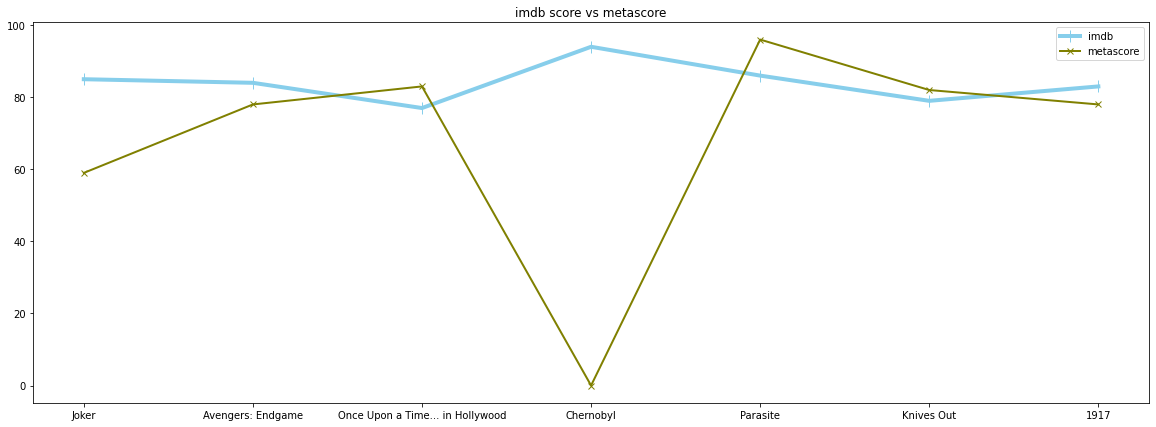

In [14]:
plt.plot( 'movie', 'imdb', data=best7, marker='|', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'movie', 'metascore', data=best7, marker='x', color='olive', linewidth=2)
plt.title('imdb score vs metascore')
plt.legend()

Analysis :
- The best seven popular movies are `Joker`, `Avenger:Endgame`, `Once Upon A time in hollywood`, `Chernobyl`, `Parasite`, `Knives Out`, `1917`, respectively.
- All the best movies have `metascores`, except for `Chernobyl`.
- `Chernobyl` has the best `imdb` scores out of all the best seven.
- `Parasite` has the best `metascore` out of all the best seven.
- Although `Joker` has the most `votes` out of all, The movie critics gave `Joker` the lowest score out of others movies.


---

Conclusions of the correlation between the `imdb` and `metascore` from The Best Seven Popular Movies in 2019:

*The most popular movies by user-votes doesn't always have the best `imdb` scores from all the imdb-user and the best `metascores` from all the most respected movie-critics*


> There are many aspects that needs to be including for further research.



Flask dashboard link :

In [ ]:
http://127.0.0.1:5000/